# Question 1

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## 1)

In [87]:
A = np.random.normal(-1, np.sqrt(2), 100)
B = np.random.normal(4, 1.5, 100)

## 2)

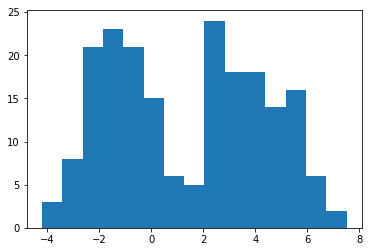

In [32]:
plt.hist(np.concatenate([A,B]), bins=15)
plt.show()

## 3)

In [93]:
print("A: Mean of sample data is ", A.mean(), " and mu is ", -1)
print("A: Var of sample data is ", np.sum((A - A.mean())**2)/(len(A)-1), " and sigma is ", 2)
print("B: Mean of sample data is ", B.mean(), " and mu is ", 4)
print("B: Var of sample data is ", np.sum((B - B.mean())**2)/(len(B)-1), " and mu is ", 2.25)


A: Mean of sample data is  -1.0169859947263509  and mu is  -1
A: Var of sample data is  2.3868886107174228  and sigma is  2
B: Mean of sample data is  4.13038196398966  and mu is  4
B: Var of sample data is  2.2064662867255413  and mu is  2.25


## 4)

In [113]:
print("Size\t Mean of A(-1)\t Var of A(2)\t Mean of B(4)\t Var of B(2.25)")
for sample_size in [100, 1000, 10000]:
    A = np.random.normal(-1, np.sqrt(2), sample_size)
    B = np.random.normal(4, 1.5, sample_size)
    print(sample_size, end="")
    print("\t ", np.round(A.mean(), 5),end = "")
    print("\t ", np.round(np.sum((A - A.mean())**2)/(len(A)-1), 5), end = "")
    print("\t ", np.round(B.mean(), 5), end = "")
    print("\t ", np.round(np.sum((B - B.mean())**2)/(len(B)-1), 5))


Size	 Mean of A(-1)	 Var of A(2)	 Mean of B(4)	 Var of B(2.25)
100	  -0.96474	  1.79222	  3.84481	  2.76565
1000	  -1.01432	  1.9874	  4.03575	  2.30538
10000	  -0.98986	  2.01694	  3.97385	  2.26989


Yes, as you can see above using a bigger sample size causes mean and var of sample to converge to the mean and var of dist.

We know from law of large numbers that as the sample size approaches +inf, mean of samples converges to mu(mean of dist) and the same holds true for Var.


## 5)

In [157]:
A = np.random.normal(-1, np.sqrt(2), 1000)
B = np.random.normal(4, 1.5, 1000)
test_samples = np.random.normal(1.5, 2, 100)
result = np.abs(test_samples - A.mean()) < np.abs(test_samples - B.mean()).astype(int)

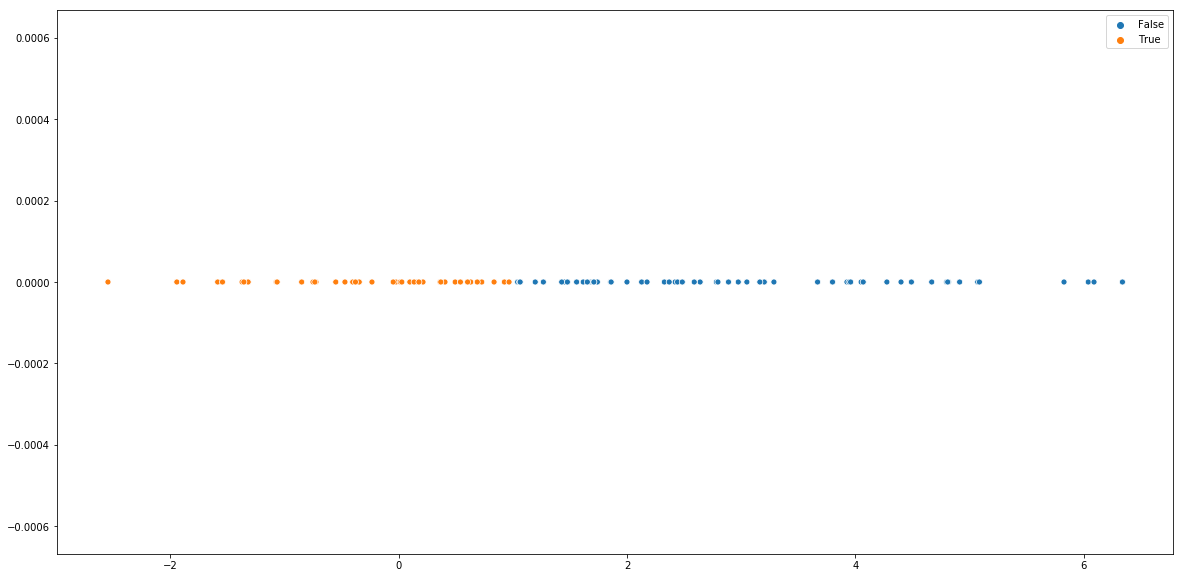

In [159]:
plt.figure(figsize=(20,10))
sns.scatterplot(test_samples, np.zeros(len(test_samples)), hue=result)


## 6)

Data is 1-D so there is no difference between results of part 6 and part 5

## 7)

In [168]:
A = A.reshape(-1, 1)
B = B.reshape(-1, 1)
test_samples = test_samples.reshape(-1, 1)
result = np.min(np.abs(A.T - test_samples), axis=1) < np.min(np.abs(B.T - test_samples), axis=1)

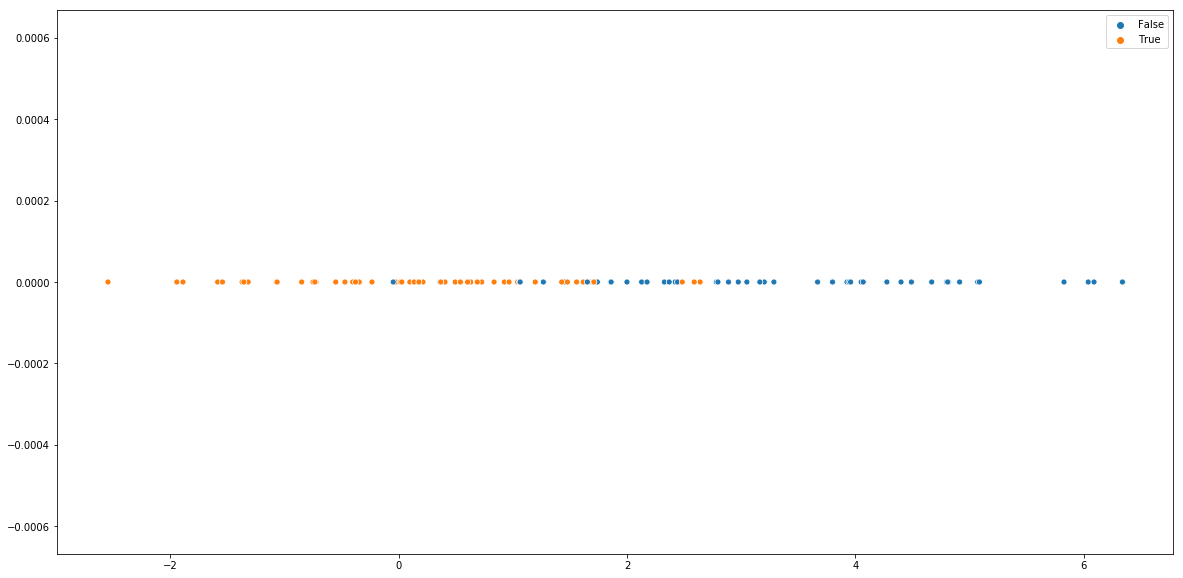

In [171]:
plt.figure(figsize=(20,10))
sns.scatterplot(test_samples.reshape(-1), np.zeros(len(test_samples)), hue=result)
plt.show()

## 8)

Classifer of part 5 only classifies according to the means thus samples are seperated into two classes with no overlap. Another problem is that it only uses mean and it does not care how the samples are spread.

Ideally decision boundary is (4-1)/2 = 1.5 meaning that any sample larger than 1.5 belongs to B dist and any sample smaller than 1.5 belongs to A dist.

But this boundaries are not always true, because these two dists have overlap and they are not compelety seperated. Using the classifier of part 7, we see some intervals belonging to both classes which seems more logical because it fits the mixed dist better.

Having more samples may help in classifing, also using larger values of k may help us decide more accurately and reduce the impact of noises.


# Question 6

## 1)

In [3]:
X_train = np.loadtxt("train_data.csv", delimiter=',', unpack=True)
Y_train = np.loadtxt("train_labels.csv", delimiter=',', unpack=True)
X_test = np.loadtxt("test_data.csv", delimiter=',', unpack=True)
Y_test = np.loadtxt("test_labels.csv", delimiter=',', unpack=True)

## 2)

In [62]:
X_train = pd.DataFrame(X_train)
means = []
for i in range(10):
    means.append(X_train[Y_train == i].mean())
means = np.array(means)
X_train = X_train.values

In [63]:
predict = np.zeros(1000)
t = time.time()
for i in range(1000):
    predict[i] = np.argmin((np.sum(np.abs(X_test[i] - means), axis=1)))
print("time: ",time.time() - t)
print("Accuracy of Nearest to mean is (L1 Distance) ", (predict == Y_test).mean())

time:  0.027340412139892578
Accuracy of Nearest to mean is (L1 Distance)  0.36


In [64]:
predict = np.zeros(1000)
t = time.time()
for i in range(1000):
    predict[i] = np.argmin((np.sum(np.power(X_test[i] - means, 2), axis=1)))
print("time: ",time.time() - t)
print("Accuracy of Nearest to mean is (L2 Distance) ", (predict == Y_test).mean())

time:  0.06875205039978027
Accuracy of Nearest to mean is (L2 Distance)  0.383


In [75]:
predict = np.zeros(1000)
t = time.time()
for i in range(1000):
    nn_idx = np.argmin(np.sum(np.abs(X_test[i] - X_train), axis=1))
    predict[i] = Y_train[nn_idx]
print("time: ",time.time() - t)
print("Accuracy of Nearest to mean is (L2 Distance) ", (predict == Y_test).mean())

time:  34.80720400810242
Accuracy of Nearest to mean is (L2 Distance)  0.249


In [98]:
t = time.time()
X2 = (X_test**2).sum(axis=1).reshape((-1, 1)) * np.ones((1, X_train.shape[0]))
XT2 = (X_train**2).sum(axis=1) * np.ones((X_test.shape[0], 1))
XXT = X_test @ X_train.T
dists = np.sqrt(X2 + XT2 - 2*XXT)
predict = Y_train[np.argmin(dists, axis=1)]
print("time: ",time.time() - t)
print("Accuracy of Nearest Neighbour is (L2 Distance) ", (predict == Y_test).mean() )

time:  0.455580472946167
Accuracy of Nearest Neighbour is (L2 Distance)  0.332
